In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [3]:
DJIA = pd.read_csv('DJIA-Data.csv')
DJIA.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
0,6.09,6.30,12.70,1.13,20.44,-3.08,8.63,-3.46,11.15,-1.20,...,7.93,-1.11,-5.50,-1.47,2.19,7.20,-6.13,-0.87,2.68,3.73
1,1.03,5.48,18.83,1.04,4.66,5.82,1.22,3.44,-0.06,3.30,...,3.77,-1.31,7.27,-0.57,7.65,7.05,1.19,15.62,-3.72,7.94
2,1.84,9.40,10.53,-0.77,-6.73,-1.75,6.39,5.95,4.02,0.27,...,0.48,7.20,-0.61,2.12,5.72,-1.11,0.31,1.41,3.59,4.26
3,0.17,4.06,-2.59,3.27,-3.52,-0.61,-4.68,3.11,1.05,-0.45,...,3.17,1.15,-5.31,8.65,-4.73,-1.57,5.62,4.24,-3.74,-1.53
4,-5.54,-7.27,-1.08,-9.36,-14.74,-7.74,-19.00,-2.07,-9.71,-8.93,...,-3.29,-4.50,-2.12,-2.85,-0.68,-9.22,3.12,-6.34,11.73,6.03


In [4]:
'''
noa - number of assets
'''
noa = len(DJIA.columns)

In [5]:
'''
sample mean vector = mu
'''
mu = DJIA.mean()
mu

MMM     1.389500
AXP     0.926500
AAPL    1.430500
BA      1.426500
CAT     0.278667
CVX     0.312000
CSCO    1.088500
KO      0.360500
DD      1.142833
XOM     0.192500
GE      1.065833
GS      1.907500
HD      2.061333
IBM    -0.047000
INTC    0.849333
JNJ     1.011333
JPM     1.840667
MCD     0.391000
MRK     0.849667
MSFT    1.668500
NKE     1.411667
PFE     0.772333
PG      0.460333
TRV     1.327000
UNH     2.052000
UTX     0.798667
VZ      0.585167
V       2.010000
WMT     0.349333
DIS     1.847833
dtype: float64

In [6]:
'''
Sample covariance matrix = cov_mat
'''
cov_mat = DJIA.cov()
cov_mat

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
MMM,16.051530,9.990780,11.510105,10.211007,12.265903,11.803618,13.582969,6.050319,17.001078,11.456781,...,6.094419,7.898257,7.099212,12.360798,7.209247,13.460737,3.900028,8.676076,2.517334,10.858599
AXP,9.990780,33.140576,11.664092,16.264694,16.351577,10.909116,16.926376,5.286522,21.420868,7.816307,...,5.352867,6.569352,0.779888,8.201991,7.752500,13.904938,-2.530693,12.033115,-2.819018,12.920187
AAPL,11.510105,11.664092,54.370493,10.296583,13.425575,9.168655,18.294531,9.023008,18.426390,5.463463,...,5.122928,2.756219,6.639571,8.967510,9.376685,10.049621,2.442640,9.988869,3.997602,11.831325
BA,10.211007,16.264694,10.296583,33.331504,6.720653,9.292277,12.167551,8.474793,22.175112,6.615872,...,8.225826,9.735759,1.812503,11.018359,7.103714,13.376197,3.400405,11.779185,-0.380743,13.497963
CAT,12.265903,16.351577,13.425575,6.720653,49.398968,18.352148,18.467452,1.135745,25.142360,13.246090,...,1.701779,3.864742,3.520446,6.902489,5.777401,18.766047,0.373009,4.758264,-6.553506,10.336258
CVX,11.803618,10.909116,9.168655,9.292277,18.352148,29.403552,10.605457,6.725358,20.738891,18.370605,...,-2.884737,7.153697,8.042279,11.607437,5.767893,13.146904,7.035901,5.432163,-1.905863,13.963060
CSCO,13.582969,16.926376,18.294531,12.167551,18.467452,10.605457,46.733766,5.141936,27.094082,8.070690,...,5.207796,6.573127,5.314389,9.545117,8.606110,18.804405,-1.184907,12.189169,-4.019454,10.972756
KO,6.050319,5.286522,9.023008,8.474793,1.135745,6.725358,5.141936,15.640842,8.336836,5.838756,...,4.789431,6.848699,6.684666,10.094674,0.515674,2.791523,9.514847,7.159478,6.910163,8.458355
DD,17.001078,21.420868,18.426390,22.175112,25.142360,20.738891,27.094082,8.336836,55.792021,14.798125,...,8.142797,11.867892,4.580426,13.919095,7.395938,24.819868,5.293346,9.658458,-5.090422,20.687010
XOM,11.456781,7.816307,5.463463,6.615872,13.246090,18.370605,8.070690,5.838756,14.798125,17.826656,...,-2.713984,6.721460,6.538942,9.531648,5.019207,10.129461,5.965392,5.773919,-0.568464,10.654706


In [7]:
'''
Sample standard deviations
'''

std_dev = DJIA.std()
std_dev

MMM     4.006436
AXP     5.756785
AAPL    7.373635
BA      5.773344
CAT     7.028440
CVX     5.422504
CSCO    6.836210
KO      3.954850
DD      7.469406
XOM     4.222163
GE      4.886400
GS      7.521116
HD      4.772765
IBM     5.003232
INTC    5.982365
JNJ     3.722520
JPM     6.877105
MCD     3.765345
MRK     4.624663
MSFT    6.504584
NKE     5.662549
PFE     4.372026
PG      3.876354
TRV     4.708013
UNH     4.893334
UTX     4.959839
VZ      4.710692
V       5.036734
WMT     4.679449
DIS     5.130527
dtype: float64

In [8]:
def minimumVariancePortfolio(cov_mat):
    unit_vector = np.array([1]*noa)
    if np.linalg.det(cov_mat) != 0:
        inv_cov = np.linalg.inv(cov_mat)
        return (np.dot(unit_vector, inv_cov)/ 
                (np.dot(np.dot(inv_cov, unit_vector),np.transpose(unit_vector))))
    else:
        return 'Not Invertible'
    

In [9]:
mvp_weights = minimumVariancePortfolio(cov_mat).round(3)

In [10]:
mvp_weights

array([-0.255,  0.139,  0.025, -0.012, -0.029, -0.056,  0.038, -0.068,
       -0.035,  0.4  , -0.05 ,  0.086,  0.079,  0.061, -0.003,  0.021,
       -0.141,  0.205,  0.083,  0.014,  0.194, -0.008,  0.03 , -0.156,
        0.128,  0.066,  0.139,  0.085,  0.201, -0.18 ])

In [11]:
np.sum(mvp_weights.round(3))

1.0010000000000001

In [12]:
mu_mvp = np.dot(mu, np.transpose(mvp_weights))
mu_mvp

0.40497083333333334

In [13]:
sigma_mvp = np.sqrt(np.dot(np.dot(mvp_weights, cov_mat),np.transpose(mvp_weights)))
sigma_mvp

1.9484393302300769

In [14]:
def sample_mean(weights, mu):
    return np.sum(mu * weights)

In [15]:
def sample_vol(weights, cov):
    return np.sqrt(np.dot(np.dot(cov, weights), weights.T))

In [16]:
def statistics(weights):
    weights = np.array(weights)
    pret = sample_mean(weights, mu)
    pvol = sample_vol(weights, cov_mat)
    return np.array([pret, pvol, pret / pvol])

In [17]:
def min_func_port(weights):
    return statistics(weights)[1]

In [18]:
bnds = tuple((0,1) for x in range(noa))

In [105]:
def minimumVarianceLine(cov_mat, mu):
    u = np.array([1]*noa)
    A = np.dot(np.dot(mu.T, np.linalg.inv(cov_mat)), u)
    B = np.dot(np.dot(mu.T, np.linalg.inv(cov_mat)), mu)
    C = np.dot(np.dot(u.T, np.linalg.inv(cov_mat)), u)
    D = B*C - A*A
    p1 = np.dot(B * np.linalg.inv(cov_mat), u)
    p2 = np.dot(A * np.linalg.inv(cov_mat), mu)
    p3 = np.dot(C*np.linalg.inv(cov_mat), mu) - np.dot(A*np.linalg.inv(cov_mat),u)
    
    eff_mu = []
    eff_vol = []
    
    for x in np.arange(0.0, 10, 0.1):
        eff_mu.append(sample_mean(((p1 - p2 + x *(p3)) / D), mu))
        eff_vol.append(sample_vol(((p1 - p2 + x *(p3)) / D), cov_mat))
    
    eff_mu = np.array(eff_mu)
    eff_vol = np.array(eff_vol)
    
    mvp_weights = ((p1 - p2 + (A/C) *(p3)) / D)
    
    mvp_mu = np.dot(mu, mvp_weights.T)
    mvp_vol = np.sqrt((B - 2 * mvp_mu*A + (mvp_mu**2)*C) /D)
    
    return eff_mu, eff_vol, mvp_mu, mvp_vol

    

In [106]:
eff_mu, eff_vol, mvp_mu, mvp_vol = minimumVarianceLine(cov_mat, mu)

In [94]:
eff_vol

array([  2.00931057,   1.98220884,   1.96256738,   1.95061156,
         1.946483  ,   1.95023142,   1.96181166,   1.98108639,
         2.00783403,   2.0417609 ,   2.08251615,   2.12970782,
         2.18291849,   2.24171961,   2.30568349,   2.37439293,
         2.44744828,   2.52447228,   2.60511294,   2.68904489,
         2.77596961,   2.86561478,   2.95773304,   3.05210048,
         3.14851485,   3.24679382,   3.34677313,   3.44830487,
         3.55125591,   3.65550632,   3.76094805,   3.86748367,
         3.97502523,   4.08349324,   4.19281581,   4.3029278 ,
         4.41377014,   4.52528915,   4.63743602,   4.75016628,
         4.86343936,   4.9772182 ,   5.0914689 ,   5.20616038,
         5.32126416,   5.43675403,   5.55260592,   5.66879762,
         5.78530866,   5.90212013,   6.01921454,   6.13657569,
         6.25418857,   6.37203923,   6.49011473,   6.60840301,
         6.72689284,   6.84557377,   6.96443601,   7.08347045,
         7.20266855,   7.32202231,   7.44152424,   7.56

In [95]:
eff_mu

array([ -1.94289029e-15,   1.00000000e-01,   2.00000000e-01,
         3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
         6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
         9.00000000e-01,   1.00000000e+00,   1.10000000e+00,
         1.20000000e+00,   1.30000000e+00,   1.40000000e+00,
         1.50000000e+00,   1.60000000e+00,   1.70000000e+00,
         1.80000000e+00,   1.90000000e+00,   2.00000000e+00,
         2.10000000e+00,   2.20000000e+00,   2.30000000e+00,
         2.40000000e+00,   2.50000000e+00,   2.60000000e+00,
         2.70000000e+00,   2.80000000e+00,   2.90000000e+00,
         3.00000000e+00,   3.10000000e+00,   3.20000000e+00,
         3.30000000e+00,   3.40000000e+00,   3.50000000e+00,
         3.60000000e+00,   3.70000000e+00,   3.80000000e+00,
         3.90000000e+00,   4.00000000e+00,   4.10000000e+00,
         4.20000000e+00,   4.30000000e+00,   4.40000000e+00,
         4.50000000e+00,   4.60000000e+00,   4.70000000e+00,
         4.80000000e+00,

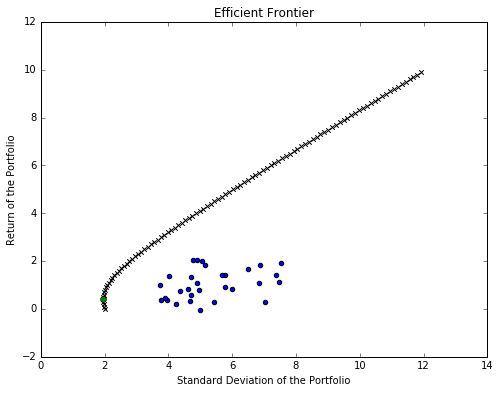

In [96]:
plt.figure(figsize=(8,6))
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation of the Portfolio')
plt.ylabel('Return of the Portfolio')
plt.scatter(eff_vol, eff_mu, color='black', marker='x')
plt.plot(sigma_mvp, mu_mvp, color='green', marker='o')
plt.scatter(std_dev, mu)
plt.show()

In [107]:
def marketWeights(cov, mu):
    u = np.array([1] * len(mu))

    return np.dot(mu - 0.15*u, np.linalg.inv(cov))/(np.dot(np.dot(mu - 0.15*u, np.linalg.inv(cov)), u.T))

In [108]:
marketWeights(cov_mat, mu)

array([  1.72106128e+00,  -7.63373595e-01,  -2.07959079e-01,
         2.21690306e-04,  -1.45010246e-01,   6.75548268e-01,
        -1.92341706e-01,  -1.04763901e+00,  -1.61072218e-01,
        -2.57376562e+00,   1.05605607e+00,  -5.84316806e-02,
         7.42538739e-01,  -3.63864187e-01,  -5.50505479e-02,
         2.37711993e+00,   5.08320988e-01,  -1.35224423e+00,
         6.30582940e-01,   2.05097244e-01,   4.54979910e-01,
        -1.24382755e+00,  -8.55615394e-01,  -3.26570290e-02,
         9.25318245e-01,  -7.36934761e-01,  -2.03436205e-03,
         1.07190004e+00,  -1.31969957e-01,   5.55045842e-01])